In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import os
import cv2

In [21]:
dir1 = ('BrainTumor/Training')
categories = []

for file in os.listdir(dir1):
    categories.append(file)
    
for i in categories:
    file_path = os.path.join(dir1,i)
    
    for file in os.listdir(file_path):
        img_path = os.path.join(file_path, file)
        image = cv2.imread(img_path)

(512, 512, 3)


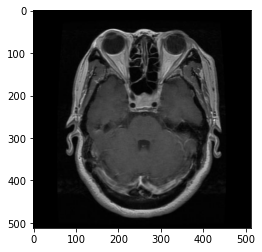

In [22]:
plt.imshow(image)
print(image.shape)

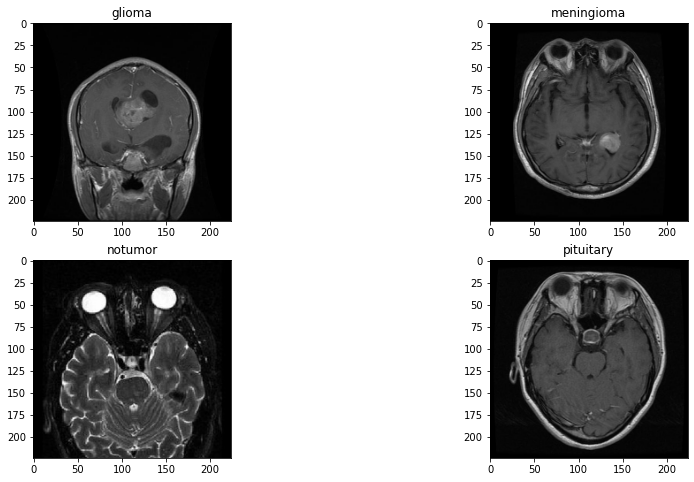

In [23]:
plt.figure(figsize=(15,8))

img_path = ['/glioma/Tr-glTr_0001.jpg','/meningioma/Tr-meTr_0001.jpg','/notumor/Tr-noTr_0001.jpg','/pituitary/Tr-piTr_0001.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(dir1 + img_path[i])
    img = cv2.resize(img, (224, 224))
    plt.imshow(img)
    plt.title(categories[i])

In [24]:
training_path = ('BrainTumor/Training')
test_path = ('BrainTumor/Testing')

training_data = []
test_data = []

def create_data(path, data):
    for category in categories:
        file = os.path.join(path, category)
        class_num = categories.index(category)
        for img in os.listdir(file):
            img_array = cv2.imread(os.path.join(file,img))
            new_array = cv2.resize(img_array,(256,256))
            data.append([new_array, class_num])
create_data(training_path, training_data)
create_data(test_path, test_data)

In [25]:
lenoftraining = len(training_data)
lenoftest = len(test_data)
print(lenoftraining,lenoftest)

5712 1311


In [26]:
X_train = []
Y_train = []
X_test = []
Y_test = []

for categories_1, label in training_data:
    X_train.append(categories_1)
    Y_train.append(label)
    
for categories_1,label in test_data:
    X_test.append(categories_1)
    Y_test.append(label)

In [27]:
X_train = np.array(X_train).reshape(lenoftraining,-1)
Y_train = np.array(Y_train)
X_test = np.array(X_test).reshape(lenoftest,-1)
Y_test = np.array(Y_test)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(5712, 196608) (5712,) (1311, 196608) (1311,)
